Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Reading the Dataset
df = pd.read_excel('/content/drive/MyDrive/Industrial_safety.xlsx')

In [4]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
df.shape

(425, 11)

Dataset contains 425 rows and 11 columns

**Data Cleansing**

In [6]:
df.describe(include= 'all')

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425.000000,425,425,425,425,425,425,425,425,425,425
unique,NaN,NaN,3,12,3,5,6,2,3,33,411
top,NaN,NaN,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,On 02/03/17 during the soil sampling in the re...
freq,NaN,NaN,251,90,241,316,143,403,189,232,3
mean,224.084706,2016-09-20 16:46:18.352941312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,118.000000,2016-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,226.000000,2016-09-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,332.000000,2017-02-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,438.000000,2017-07-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. We observed that there are observations of accidents starting from 1st Jan 2016 to 9th July 2017, which indicates zero outliers.
2. There are 3 Countries out of which Country 01 has the highest number of accidents (more than 50%).
3. There are 12 local cities where the manufacturing plants are located, out of which Local 03 (which also belongs to Country 01) is where most of the accidents happen.
4. Mining sector is the most significant contributor to accidents.
Male (95%) and Third Party (43%) also accounts for people who are suffered by more accidents.


In [7]:
# Drop irrelevant column Unnamed:0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# Renaming the columns
df.rename(columns = { 'Data' : 'Date',
                      'Industry Sector' : 'Industry_Sector',
                      'Accident Level': 'Accident_Level',
                      'Countries' : 'Country',
                      'Genre' : 'Gender',
                      'Potential Accident Level' : 'Potential_Accident_Level',
                      'Employee or Third Party' : 'Employee_Type',
                      'Critical Risk' : 'Critical_Risk'}, inplace = True)

In [9]:
df.head()

,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [10]:
def data_summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary.rename(columns={'index': 'Name'}, inplace=True)
    summary['Missing_values'] = df.isnull().sum().values
    summary['Unique_values'] = df.nunique().values
    summary['Duplicate_values'] = df.duplicated().sum()

    return summary

In [11]:
data_summary(df)

,Name,dtypes,Missing_values,Unique_values,Duplicate_values
0,Date,datetime64[ns],0,287,7
1,Country,object,0,3,7
2,Local,object,0,12,7
3,Industry_Sector,object,0,3,7
4,Accident_Level,object,0,5,7
5,Potential_Accident_Level,object,0,6,7
6,Gender,object,0,2,7
7,Employee_Type,object,0,3,7
8,Critical_Risk,object,0,33,7
9,Description,object,0,411,7


In [12]:
df[df.duplicated()]

,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


**Insights:**

1. Dataset contains total of 10 columns in which all are object data type except the date.
2. There are no null / missing values present in the dataset.
3. However, there are 7 duplicate entries found where all the columns have same value referring to people involved in the same accident.There are only 7 records hence we can drop them.
Capturing the number of people will not be helpful in our analysis.

In [13]:
df.drop_duplicates(inplace=True)
print('After removing duplicates the shape of the dataset is:',df.shape)

After removing duplicates the shape of the dataset is: (418, 10)


In [14]:
# Calling the function again to get some more insights
data_summary(df)

,Name,dtypes,Missing_values,Unique_values,Duplicate_values
0,Date,datetime64[ns],0,287,0
1,Country,object,0,3,0
2,Local,object,0,12,0
3,Industry_Sector,object,0,3,0
4,Accident_Level,object,0,5,0
5,Potential_Accident_Level,object,0,6,0
6,Gender,object,0,2,0
7,Employee_Type,object,0,3,0
8,Critical_Risk,object,0,33,0
9,Description,object,0,411,0


We observe that there are 411 unique values in the description column and we have 418 rows, so this proves that there are few more duplicate rows in the dataset.

In [15]:
# Printing the hidden duplicate values in the dataset
print('There are still {} duplicates in the dataset as below'.format(df.duplicated(subset=['Description'],keep=False).sum()))

There are still 14 duplicates in the dataset as below


In [16]:
df[df.duplicated(subset=['Description'],keep=False)].sort_values(by='Description')

,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
166,2016-07-07,Country_01,Local_03,Mining,IV,V,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
167,2016-07-07,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
261,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
263,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
412,2017-06-20,Country_01,Local_01,Mining,I,IV,Male,Employee,Others,"In circumstance, the AHK-903 license plate (Em..."
413,2017-06-20,Country_01,Local_01,Mining,I,IV,Male,Third Party,Others,"In circumstance, the AHK-903 license plate (Em..."
130,2016-05-26,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"In the geological reconnaissance activity, in ..."
131,2016-05-26,Country_03,Local_10,Others,I,I,Male,Employee,Others,"In the geological reconnaissance activity, in ..."
143,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Project of Vazante that carried out sediment c...
144,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Others,Project of Vazante that carried out sediment c...


1. We can cleary observe that the above dataframe contains 7 duplicates out of which one or two column values are dissimilar where in the Description is matching.

2. We also observe that the incidents which are having duplicate values happened during the same time.
Hence we will be dropping these hidden duplicates which doesn't support logically.

In [17]:
# Dropping the duplicates we detected above.
df.drop_duplicates(subset=['Description'], keep='first', inplace=True)
print('After removing duplicates the shape of the dataset is:', df.shape)

After removing duplicates the shape of the dataset is: (411, 10)


In [18]:
data_summary(df)

,Name,dtypes,Missing_values,Unique_values,Duplicate_values
0,Date,datetime64[ns],0,287,0
1,Country,object,0,3,0
2,Local,object,0,12,0
3,Industry_Sector,object,0,3,0
4,Accident_Level,object,0,5,0
5,Potential_Accident_Level,object,0,6,0
6,Gender,object,0,2,0
7,Employee_Type,object,0,3,0
8,Critical_Risk,object,0,33,0
9,Description,object,0,411,0


Now the unique values are equal to the number of rows present in the dataset.

**Data Pre-processing**

Lets split the Date column into Day, Month and Year

In [19]:
df['Only_Date'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [20]:
df.head(5)

,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Only_Date,Month,Year
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,1,2016
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2,1,2016
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,6,1,2016
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,8,1,2016
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,10,1,2016


In [21]:
#Dropping date column as it's no longer needed
df.drop(['Date'],axis=1,inplace=True)

In [22]:
df.head(10)

,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Only_Date,Month,Year
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,1,2016
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2,1,2016
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,6,1,2016
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,8,1,2016
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,10,1,2016
5,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...,12,1,2016
6,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...,16,1,2016
7,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic...",17,1,2016
8,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...,19,1,2016
9,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...,26,1,2016


Converting Months to categorical format

In [23]:
Month_Modified = {

    1   :  'January',
    2   :  'February',
    3   :  'March',
    4   :  'April',
    5   :  'May',
    6   :  'June',
    7   :  'July',
    8   :  'August',
    9   :  'September',
    10  :  'October',
    11  :  'November',
    12  :  'December'

}

In [24]:
df['Month_Modified'] = df['Month'].map(Month_Modified)

In [25]:
df.head()

,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Only_Date,Month,Year,Month_Modified
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,1,2016,January
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2,1,2016,January
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,6,1,2016,January
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,8,1,2016,January
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,10,1,2016,January


In [26]:
df.drop(['Month'],axis=1,inplace=True)

In [27]:
df.head(3)

,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Only_Date,Year,Month_Modified
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016,January
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2,2016,January
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,6,2016,January


In [28]:
df.rename(columns={'Month_Modified': 'Month', 'Only_Date' : 'Date'}, inplace=True)
df.head(5)

,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Date,Year,Month
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016,January
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2,2016,January
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,6,2016,January
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,8,2016,January
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,10,2016,January


In [29]:
# Looping through all the columns in the dataframe and checking counts of unique values.
for col in df.columns:
    if (col!='Description') and (col!='Date') and (col!='Month') and (col!='Year'):
        print(df[col].value_counts())
        print('*'*50)

Country
Country_01    245
Country_02    127
Country_03     39
Name: count, dtype: int64
**************************************************
Local
Local_03    87
Local_05    59
Local_04    55
Local_01    55
Local_06    46
Local_10    39
Local_08    27
Local_02    23
Local_07    12
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
**************************************************
Industry_Sector
Mining    232
Metals    134
Others     45
Name: count, dtype: int64
**************************************************
Accident_Level
I      303
II      39
III     31
IV      30
V        8
Name: count, dtype: int64
**************************************************
Potential_Accident_Level
IV     138
III    106
II      95
I       43
V       28
VI       1
Name: count, dtype: int64
**************************************************
Gender
Male      390
Female     21
Name: count, dtype: int64
**************************************************
Employee_Type
Third Party           

1. There are 3 countries involved here, out of which more accidents occurred in country 01
2. Accidents majorly happen in mining and metals industry sector
3. Accidental Level looks quite biased and would not support in model building hence it's better to drop this column and consider potential accident level instead
4. There are six types of Potential_Accident_Level and we modify the sixth category row as five to reduce the complexity
5. Seems like males have faced majority accidents
6. There are about 33 critical risks in which more than half of the incidents fall under the 'Others' category

In [30]:
# Replace Level 6 value to Level 5
df['Potential_Accident_Level'] = df['Potential_Accident_Level'].replace('VI', 'V')

In [31]:
df['Potential_Accident_Level'].value_counts()

Potential_Accident_Level
IV     138
III    106
II      95
I       43
V       29
Name: count, dtype: int64

In [32]:
df['Accident_Level'].value_counts()

Accident_Level
I      303
II      39
III     31
IV      30
V        8
Name: count, dtype: int64

In [33]:
df.dtypes

Country                     object
Local                       object
Industry_Sector             object
Accident_Level              object
Potential_Accident_Level    object
Gender                      object
Employee_Type               object
Critical_Risk               object
Description                 object
Date                         int32
Year                         int32
Month                       object
dtype: object

In [34]:
# converting to string variables
df['Year'] = df['Year'].astype(str)
df['Date'] = df['Date'].astype(str)

In [35]:
df.dtypes

Country                     object
Local                       object
Industry_Sector             object
Accident_Level              object
Potential_Accident_Level    object
Gender                      object
Employee_Type               object
Critical_Risk               object
Description                 object
Date                        object
Year                        object
Month                       object
dtype: object

In [36]:
df.head(5)

,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Date,Year,Month
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016,January
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2,2016,January
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,6,2016,January
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,8,2016,January
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,10,2016,January


**Visualizations**

**Univariate Analysis**

**Top Critical Risks**

<Axes: xlabel='Critical_Risk'>

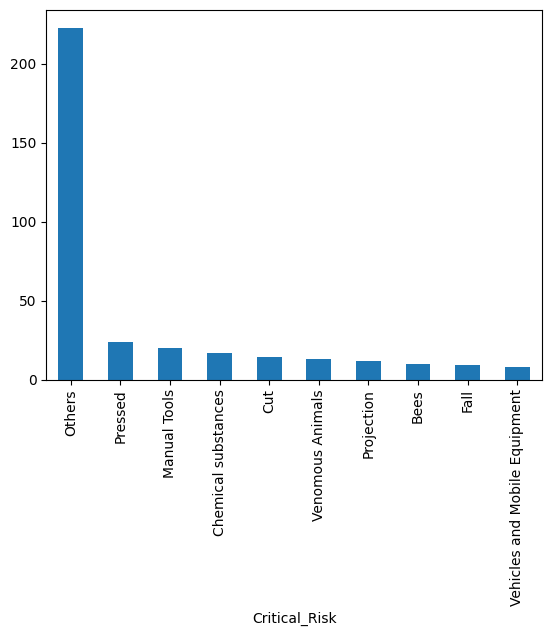

In [37]:
# Top 10 Critical Risks

df['Critical_Risk'].value_counts().head(10).plot(kind='bar')

1. Most of the Critical Risks are classified as 'Others' that is almost 50% of the dataset, hence there are too many risks to be classified precisely.
2. Followed by Pressed, Manual tools, Chemical substances, Cut etc..

<Axes: ylabel='count'>

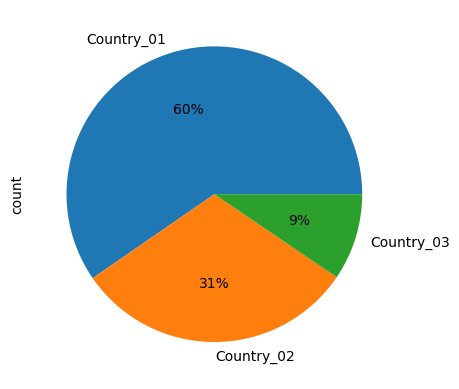

In [37]:
df['Country'].value_counts().head(10).plot(kind='pie', autopct = '%.0f%%')

1. 60% accidents occurred in Country_01
2. 31% accidents occurred in Country_02
3. 9% accidents occurred in Country_03

<Axes: xlabel='Local'>

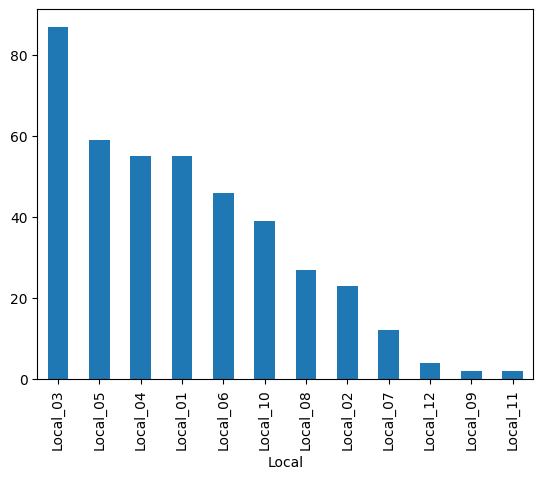

In [38]:
df['Local'].value_counts().plot(kind='bar')

1. Highest manufacturing plants are located in Local_03 city.
2. Lowest manufacturing plants are located in Local_09 city.

<Axes: xlabel='count', ylabel='Gender'>

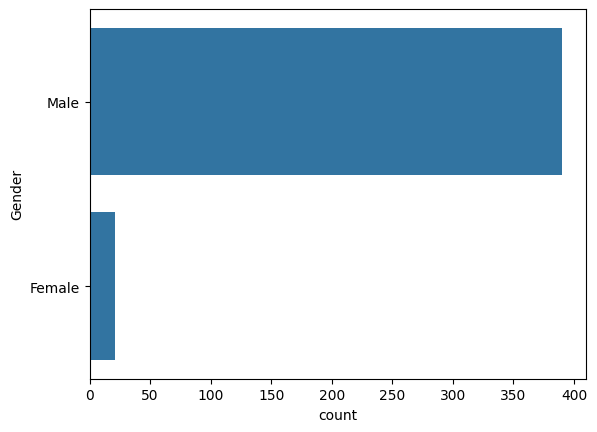

In [39]:
sns.countplot(df['Gender'])

We observe that number of men working in this manufacturing plants are more when compared to women

<Axes: xlabel='count', ylabel='Employee_Type'>

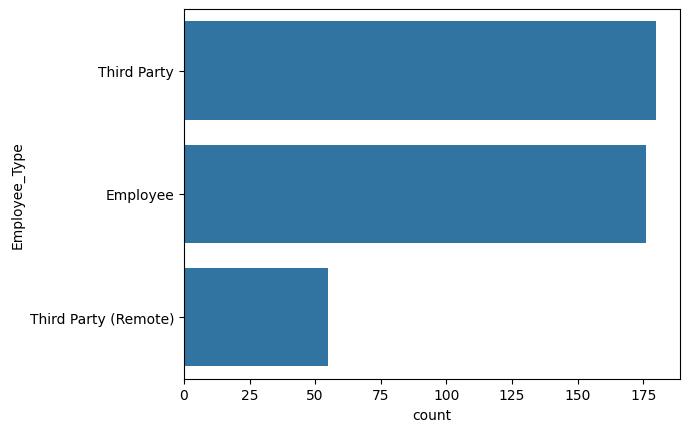

In [40]:
sns.countplot(df['Employee_Type'])

1. We have equal number of people working as employee and from third parties.
2. Few are working from remote which indicates that accidents might be less under "Third Party(remote)" category

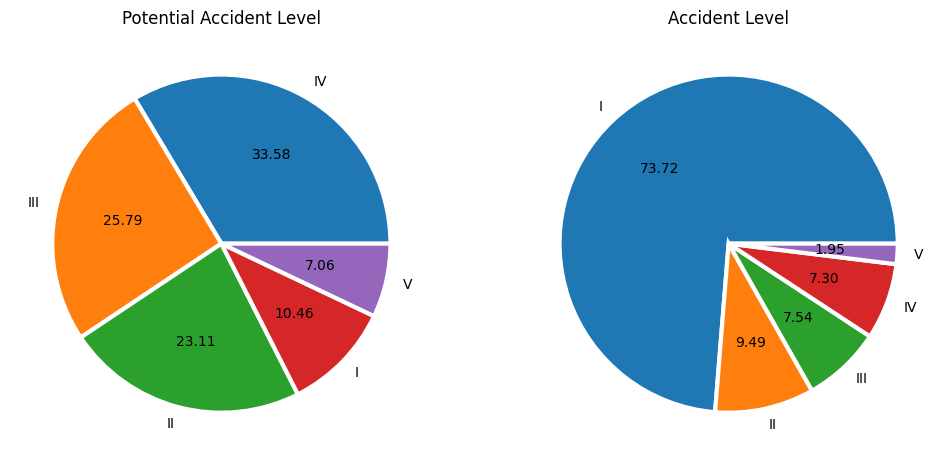

In [46]:
#Potential Accident Level vs Accident Level
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(df['Potential_Accident_Level'].value_counts().head(), labels=df['Potential_Accident_Level'].value_counts().head().index, autopct="%.2f",wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
axs[0].set_title('Potential Accident Level')

axs[1].pie(df['Accident_Level'].value_counts().head(), labels=df['Accident_Level'].value_counts().head().index, autopct="%.2f", wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
axs[1].set_title('Accident Level')

plt.show()

**Potential Accident Level**
1. Level IV accidents are the highest followed by Level III, II and I
2. Level V accidents are the lowest

**Accident Level**
1. 73% of observations belongs to type I accidents.
2. High severity accidents are 1.95%.

<Axes: xlabel='Industry_Sector', ylabel='count'>

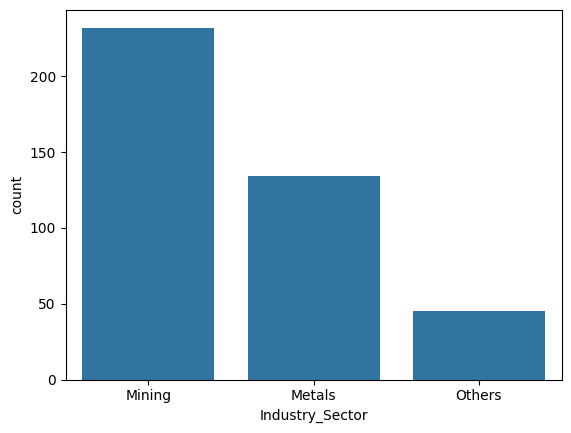

In [43]:
sns.countplot(data=df, x='Industry_Sector')

We observe that mining has the highest count hence accidents likely might have been the highest in this sector.

**Time Series Analysis**

In [44]:
!pip install holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
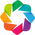

In [45]:
import holoviews as hv
hv.extension('bokeh')

In [46]:
from holoviews import opts

In [47]:
# Calculate percentage counts for year, month, and date
year_cnt = np.round(df['Year'].value_counts(normalize=True, sort=False) * 100)
month_cnt = np.round(df['Month'].value_counts(normalize=True, sort=False) * 100)
day_cnt = np.round(df['Date'].value_counts(normalize=True, sort=False) * 100)

In [48]:
# Create Holoviews Bars and Curve objects for year, month, and date
y = hv.Bars(year_cnt).opts(title="Accidents by Year", color="green", xlabel="Years")
m = (hv.Bars(month_cnt).opts(title="Accidents by Month", color="skyblue", xlabel="Months") *
     hv.Curve(month_cnt).opts(color='red', line_width=3))
d = (hv.Bars(day_cnt).opts(title="Accidents occurred by Day", color="skyblue", xlabel="Days") *
     hv.Curve(day_cnt).opts(color='red', line_width=3))

In [49]:
# Combine the plots and customize the layout
layout = (y + m + d).opts(opts.Bars(width=400, height=300, tools=['hover'], show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
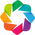

/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Bars.I     :Bars   [Year]   (proportion)
   .Overlay.I  :Overlay
      .Bars.I  :Bars   [Month]   (proportion)
      .Curve.I :Curve   [Month]   (proportion)
   .Overlay.II :Overlay
      .Bars.I  :Bars   [Date]   (proportion)
      .Curve.I :Curve   [Date]   (proportion)

In [50]:
hv.extension('bokeh')
layout

From the above graphs, we infer that
1. Accidents occurred in 2016 and 2017.
2. Number of accidents are higher in beginning of the year and it keeps decreasing later.
3. Accident count is high during specific dates such as 4th, 8th and 16th of every month


**Bivariate Analysis**

**Accident severity distribution by industry sector**

<Axes: xlabel='Industry_Sector'>

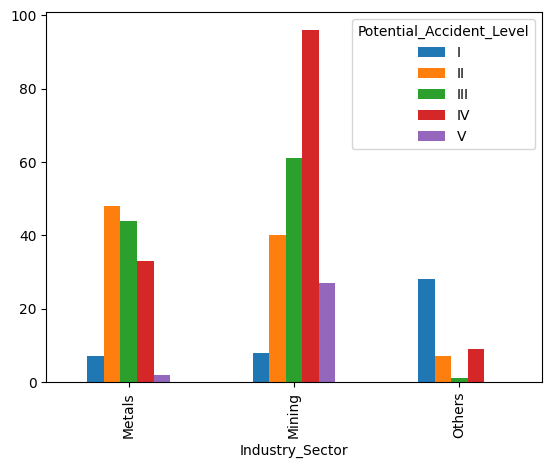

In [51]:
df.groupby(['Industry_Sector', 'Potential_Accident_Level']).size().unstack().plot(kind='bar')

It clearly indicates that mining industries witness more accidents. Hence, We can say that mining job is more risky than the others.

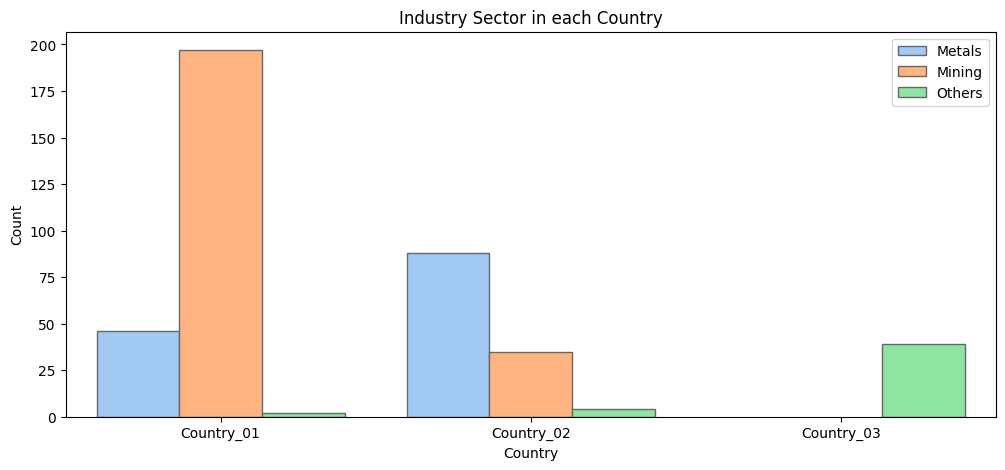

In [52]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'Country', hue='Industry_Sector', hue_order=df['Industry_Sector'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

plt.title('Industry Sector in each Country');
plt.ylabel('Count');
plt.legend(loc='upper right')

1. Mining and Metals industry are not present in country_03 which proves why the accident count is significantly low in this country
2. Mining activities are higher in country_01.

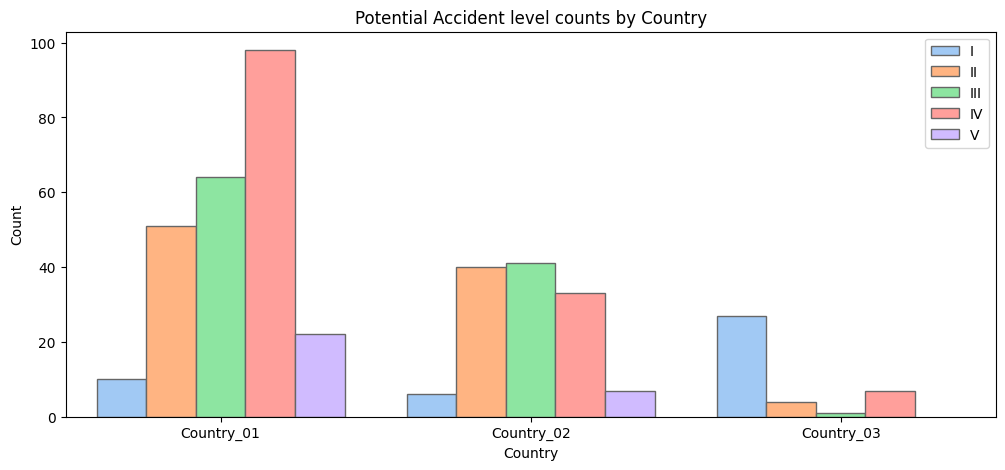

In [53]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'Country', hue='Potential_Accident_Level', hue_order=df['Potential_Accident_Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

plt.title('Potential Accident level counts by Country');
plt.ylabel('Count');
plt.legend(loc='upper right')

Above graph clearly states that,
1. Country_01 has more number of severe accidents especially Level IV
2. Country_02 has moderate accidents across all the levels
3. Country_03 'level I' accidents counts is more compared to country_01 and country_02 but less severe accidents.

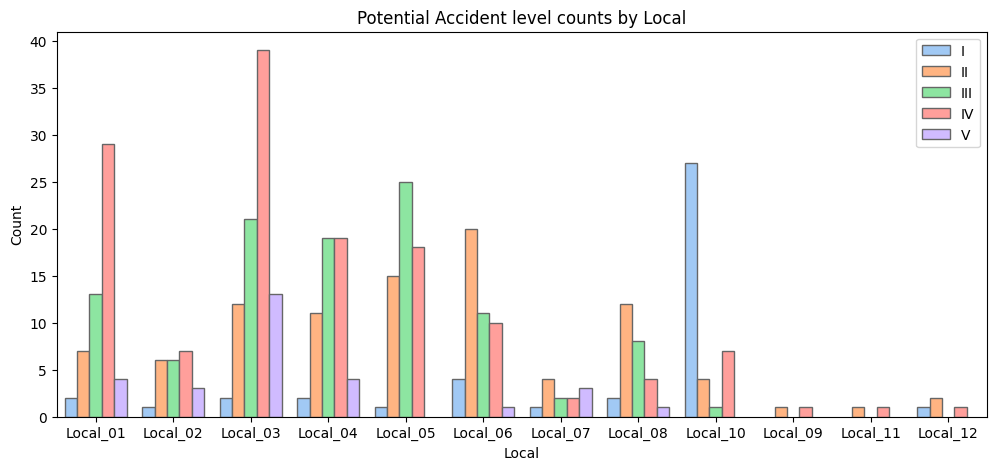

In [54]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'Local', hue='Potential_Accident_Level', hue_order=df['Potential_Accident_Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

plt.title('Potential Accident level counts by Local');
plt.ylabel('Count');
plt.legend(loc='upper right')

We observe that,
1. Level_1 accidents are higher in local_10.
2. Level_4 accidents are higher in local_01 and local_03 cities.
3. Highest manufacturing plants are located in Local_03 city, alternatively lowest manufacturing count is in Local_09 city.


Text(0.5, 0, 'Employee_Type')

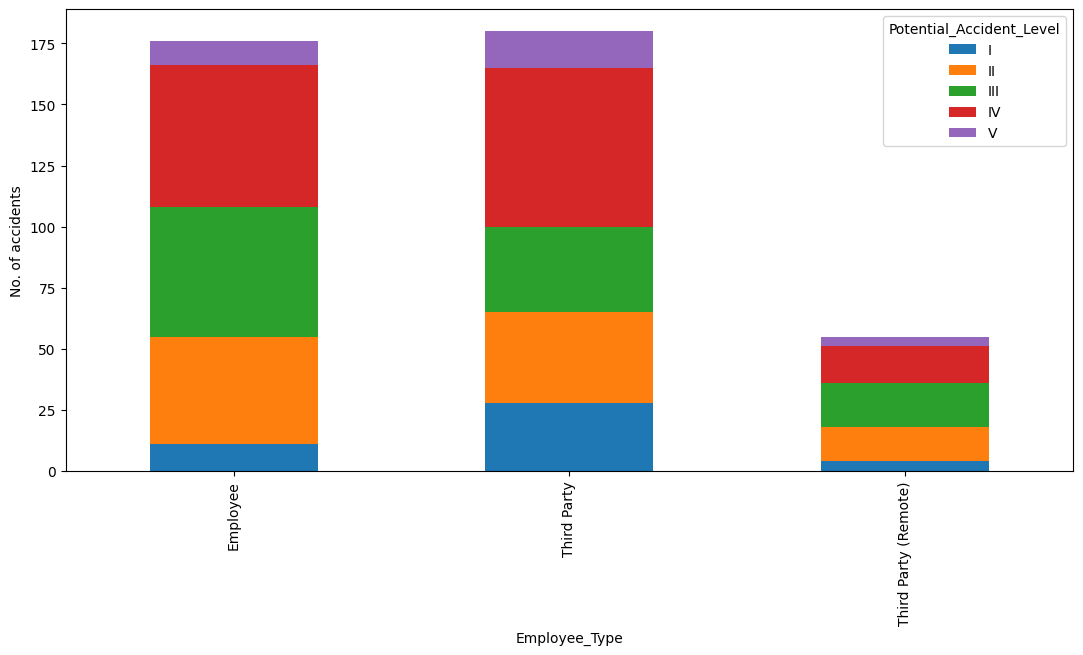

In [55]:
ct = pd.crosstab(columns=df["Potential_Accident_Level"],index=df["Employee_Type"])
ax = ct.plot(kind="bar",stacked=True,figsize=(13,6))
ax.set_ylabel('No. of accidents')
ax.set_xlabel('Employee_Type')

We observe that third party employees have faced high severity accidents such as level IV
Whereas the count of accidents is less for third parties working remotely when compared to employees and third party working on-site.

Text(0.5, 0, 'Month')

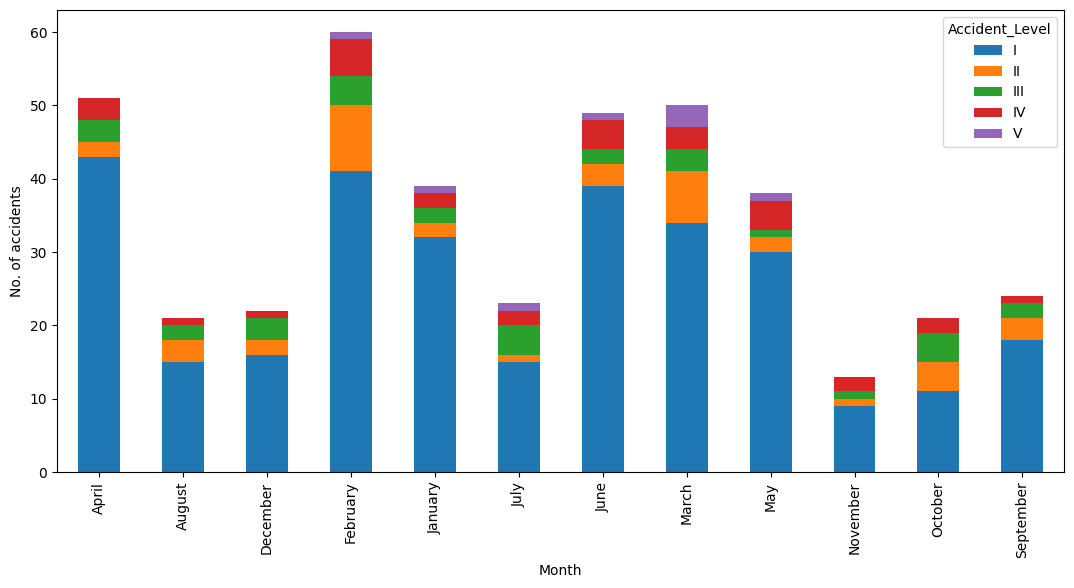

In [76]:
ct = pd.crosstab(columns=df["Accident_Level"],index=df["Month"])
ax = ct.plot(kind="bar",stacked=True,figsize=(13,6))
ax.set_ylabel('No. of accidents')
ax.set_xlabel('Month')

1. Initial months of the year see more accidents which seem to decrease by year end
2. High severity accidents(IV, V) occur during the initial months.

**Multivariate Analysis**

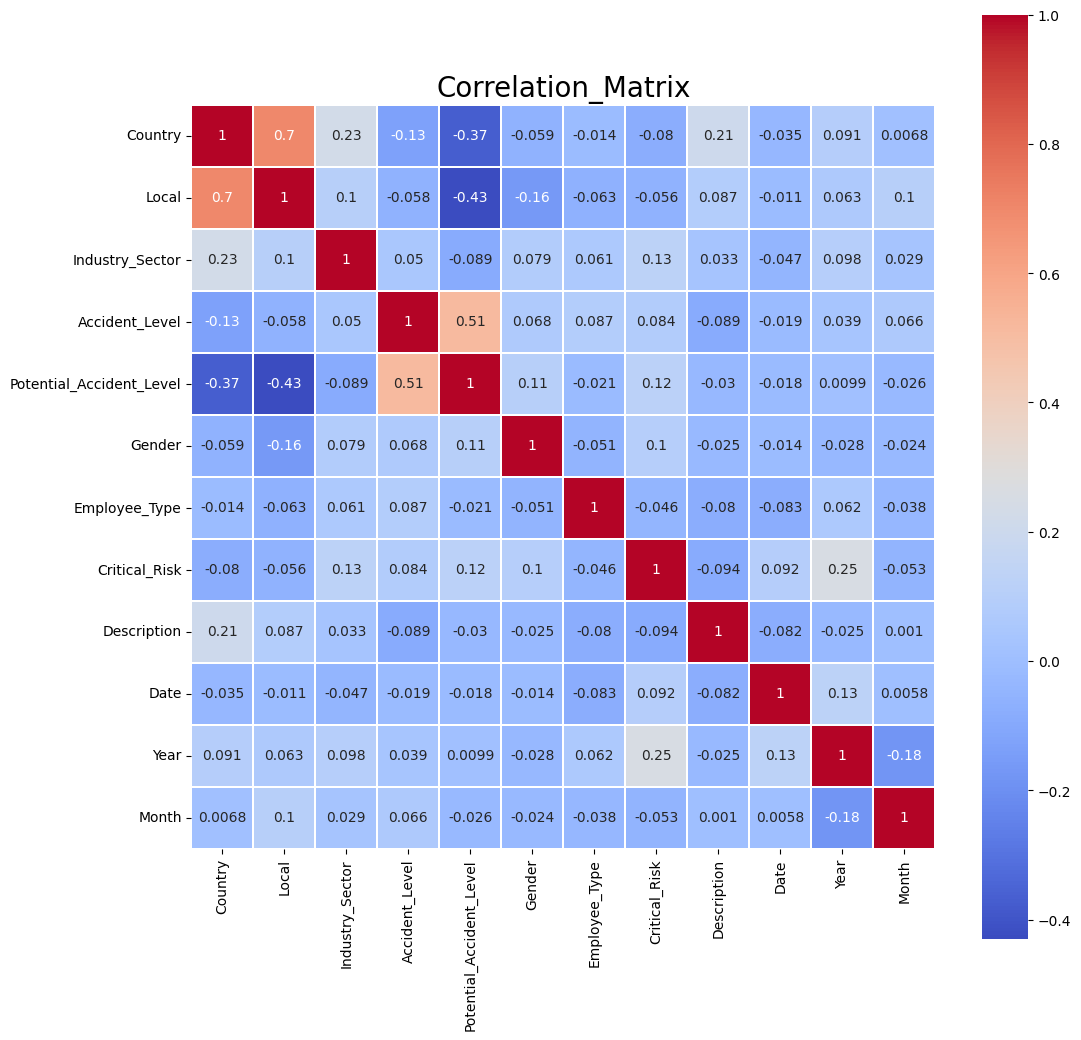

In [56]:
# Correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encode = df.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_encode.corr(), square=True, cmap='coolwarm', annot=True, linewidth=0.2);

1. Country and Local is highly correlated about 70%
2. Accident level is negatively correlated with country and local

**EDA Summary**

**Local**

1. Highest manufacturing plants are located in Local_03 city
2. Lowest in Local_09 city.
Country

**Percentage(%) of accidents occurred in respective countries:**
59% in Country_01, 31% in Country_02 and 10% in Country_03.

**Industry Sector**

1. Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.
Country + Industry Sector

2. Metals and Mining industry sector plants are not available in Country_03.

**Gender**

1. There are more men working in this industry as compared to women.
Employee type
2. Equal number of Third party empoyees and own empoyees work in these manufactuirng plants whereas the count is significantly low under Third party(Remote) category.

**Critical Risk**

Most of the critical risks are classified as Others.

**Potential Accident Level**
1. Highest count of accidents are Level IV
2. Country_01 has more number of severe accidents especially Level IV
3. Country_03 'level I' accidents counts is more compared to country_01 and country_02 but less severe accidents.

**Potential Accident Level + Employee type**

1. Third party employees have faced high severity accidents such as level IV
2. The count of accidents is less for third parties working remotely when compared to employees and third party working on-site.

**Potential Accident Level + Calendar**

1. Accidents are recorded from 2016 to 2017 every month, 2016 being the highest.
2. Number of accidents are high in beginning of the year and it keeps decreasing later.
3. Number of accidents are very high in particular days like 4, 8 and 16 in every month.



In [47]:
df_new = df.copy()

In [48]:
df_new.drop(columns=['Date', 'Year', 'Month'], inplace= True)

In [49]:
df_new.reset_index()

,index,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
406,420,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
407,421,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
408,422,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
409,423,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [50]:
df_new.shape

(411, 9)

**Data preprocessing (NLP Preprocessing techniques)**

In [51]:
df_new['Description']

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 411, dtype: object

**Data Cleaning (removing stopwords,remove punctuation, converting them into tokens)**

In [52]:
import os
import re
import nltk
import unicodedata
nltk.download('wordnet')
nltk.download('stopwords')

# to remove common stop words
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
stopwords_list = stopwords.words("english")
stopwords = set(stopwords_list)

In [54]:
# Defining a function for NLP preprocessing
def nlp_cleaning(text):

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text\
    pattern = '[^A-Za-z0-9]+'
    words = re.sub(pattern, ' ', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lems = [lemmatizer.lemmatize(i.strip()) for i in words if i not in stopwords]

    words = [w for w in lems if len(w)>2]

    return words

In [55]:
# Apply all the preprocessing techniques we have defined on Description columns
tokens = nlp_cleaning(' '.join(df_new['Description'].sum().split()))

In [56]:
tokens

['removing',
 'drill',
 'rod',
 'jumbo',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'mechanic',
 'support',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hand',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slide',
 'point',
 'support',
 'tightens',
 'finger',
 'mechanic',
 'drilling',
 'bar',
 'beam',
 'jumbo',
 'activation',
 'sodium',
 'sulphide',
 'pump',
 'piping',
 'uncoupled',
 'sulfide',
 'solution',
 'designed',
 'area',
 'reach',
 'maid',
 'immediately',
 'made',
 'use',
 'emergency',
 'shower',
 'directed',
 'ambulatory',
 'doctor',
 'later',
 'hospital',
 'note',
 'sulphide',
 'solution',
 'gram',
 'liter',
 'sub',
 'station',
 'milpo',
 'located',
 'level',
 '170',
 'collaborator',
 'excavation',
 'work',
 'pick',
 'hand',
 'tool',
 'hitting',
 'rock',
 'flat',
 'part',
 'beak',
 'bounce',
 'hitting',
 'steel',
 'tip',
 'safety',
 'shoe',
 'metatarsal',
 'area',
 

In [57]:
# Printing first 20 words
print('Length of all the words:', len(tokens),'\n')
print('Length of unique tokens in the dataset:', len(np.unique(tokens)),'\n')
np.array(tokens[0:20])

Length of all the words: 13325 

Length of unique tokens in the dataset: 2963 



array(['removing', 'drill', 'rod', 'jumbo', 'maintenance', 'supervisor',
       'proceeds', 'loosen', 'support', 'intermediate', 'centralizer',
       'facilitate', 'removal', 'seeing', 'mechanic', 'support', 'one',
       'end', 'drill', 'equipment'], dtype='<U12')

In [58]:
df_new['New_Description'] = df_new.apply(lambda x: " ".join(nlp_cleaning(x.Description)), axis=1)

In [59]:
df_new.head()

,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,New_Description
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo maintenance superviso...
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,sub station milpo located level 170 collaborat...
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,approximately 1880 695 ob7 personnel begin tas...
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,approximately circumstance mechanic anthony gr...


We can observe that regex simply removed the special characters and retained the alphabets and numbers.

We can observe that all the text has now successfully been converted to lower case.

White spaces have been removed.

In [60]:
!pip install wordcloud

In [61]:
from wordcloud import WordCloud

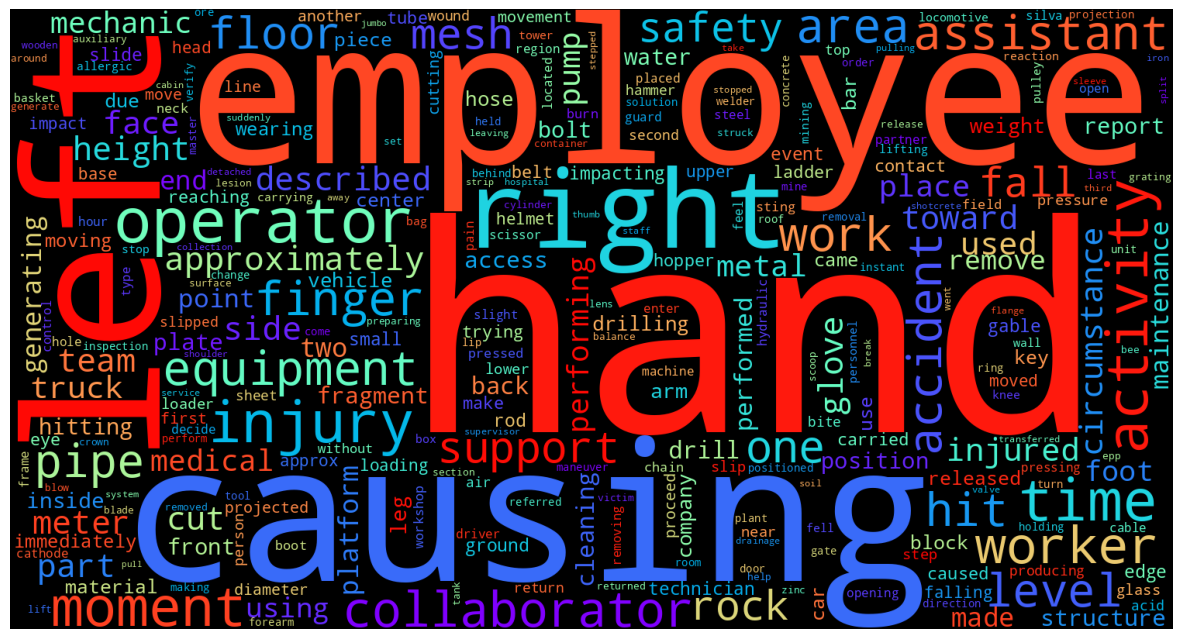

In [63]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow',
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(df_new['New_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

After pre-processing the description, we observe that,

1. There are many body-related, employee related, equipment-related and accident-related words.
2. Most occurred words are employee, hand, left, causing, right

**Body-related:** left, right, hand, finger, eye, face, foot and glove
**Employee-related:** employee, operator, collaborator, assistant, worker and mechanic
**Equipment-related:** equipment, pump, meter, drill, truck and tube
**Accident-related:** accident, activity, safety, injury, causing

**N-Grams**

In [64]:
import nltk

def extract_ngrams(data_series, num):
    ngrams_list = []
    for text in data_series:
        # Taking ngrams on each element of the Series
        ngrams = nltk.ngrams(text.split(), num)
        ngrams_list.extend(ngrams)

    # Taking the frequency distribution of ngrams
    ngrams_freq = nltk.FreqDist(ngrams_list)

    # Taking the top 30 most common ngrams
    top_ngrams = ngrams_freq.most_common(30)

    # Creating a DataFrame with ngrams and their counts
    ngrams_df = pd.DataFrame(top_ngrams, columns=['N-grams', 'Count'])

    # Joining the tokens in each n-gram to form a string representation
    ngrams_df['N-grams'] = [' '.join(ngram) for ngram in ngrams_df['N-grams']]

    # Setting the 'N-grams' column as the index
    ngrams_df.set_index('N-grams', inplace=True)

    # Returns the DataFrame containing unique ngrams ordered by their counts
    return ngrams_df


In [65]:
# Uni-Grams
uni_grams = extract_ngrams(df_new['New_Description'], 1)

# Printing top words with their counts
uni_grams[0:10]

,Count
N-grams,
hand,176
employee,170
causing,164
left,154
right,153
operator,129
time,111
activity,109
injury,108


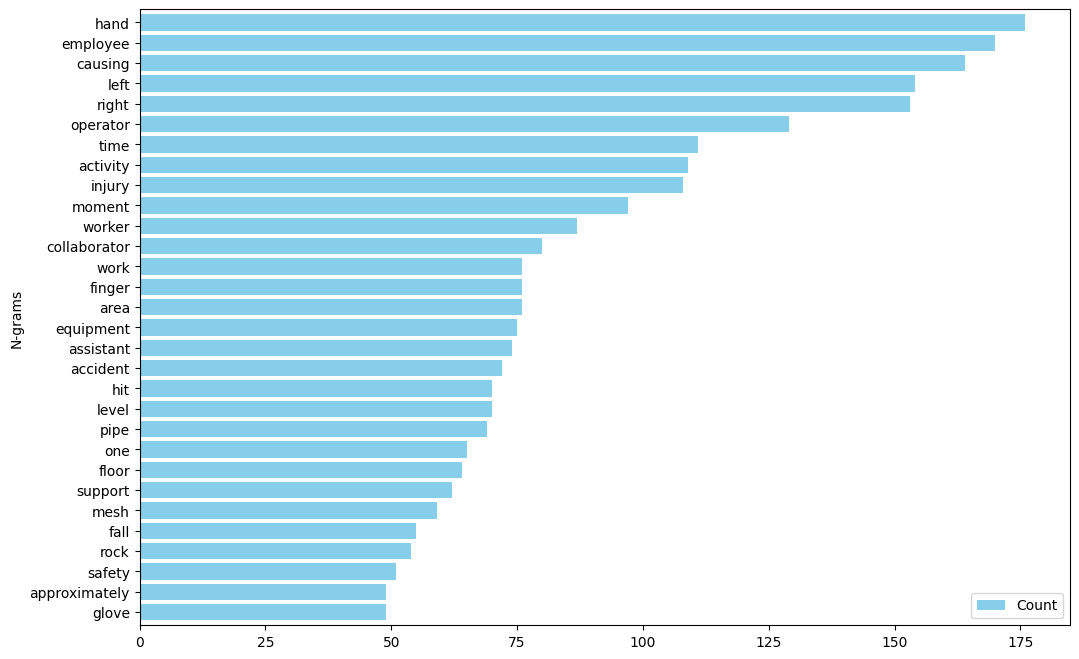

In [66]:
# Visualising the ngrams
uni_grams.sort_values(by='Count').plot.barh(color = 'skyblue', width = 0.8, figsize = (12,8));

In [67]:
# Bi-Grams
bi_grams = extract_ngrams(df_new['New_Description'], 2)

# Printing the words with their counts
bi_grams[0:10]

,Count
N-grams,
left hand,70
right hand,57
time accident,55
causing injury,53
finger left,25
employee report,22
injury described,19
medical center,17
described injury,17


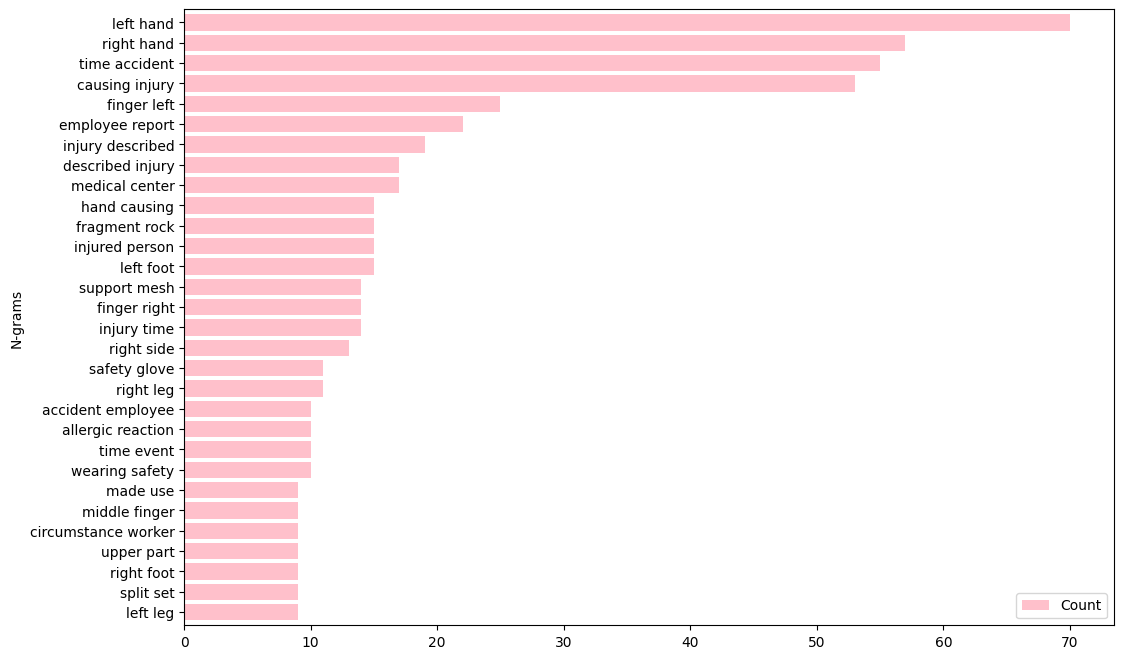

In [68]:
bi_grams.sort_values(by='Count').plot.barh(color = 'pink', width = 0.8, figsize = (12,8));

1. There are many phrases which is related to hands. For example left hand, right hand, finger left etc.
2. There are also some phrases which is related to other body parts. For example left foot and right foot.

ML Model Building

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new['New_Description'], df_new['Accident_Level'].values, test_size=0.2, random_state=42)

In [82]:
print('Training shape: {}'.format(X_train.shape))
print('Validation shape: {}'.format(X_test.shape))

Training shape: (328,)
Validation shape: (83,)


In [83]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [86]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
    }

    names = []
    scores = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one
        result = clf.score(X_test,y_test)

        names.append(name)
        scores.append(result) # Appending the test scores to the list

        result_df =  pd.DataFrame({'Model': names, 'Accuracy': scores}) # Creating the dataframe using the model scores

    return result_df

In [87]:
ml_models(X_train_bow.toarray(), Y_train, X_test_bow.toarray(), Y_test)

,Model,Accuracy
0,Naive Bayes,0.746988
1,KNN,0.746988
2,SVM,0.746988
3,Decision Tree,0.698795
4,AdaBoost,0.734940
5,Gradient Boost,0.722892
